In [2]:
import pandas as pd

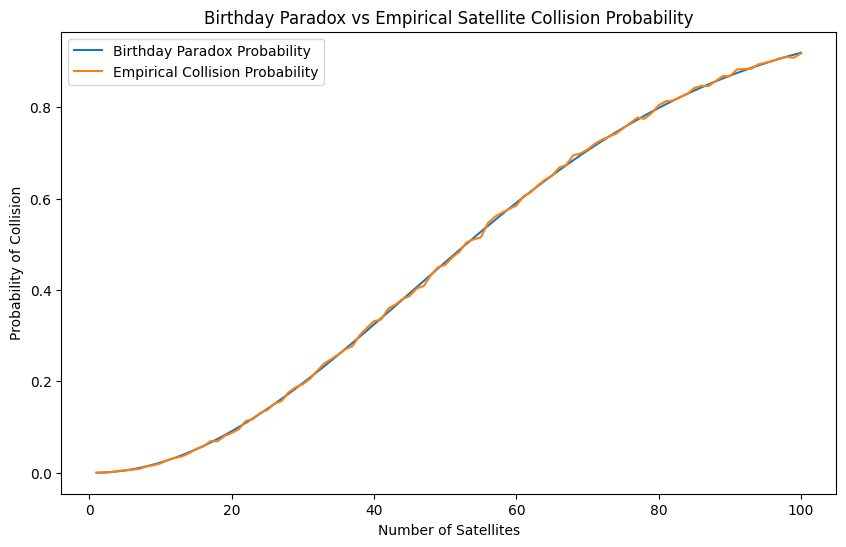

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def satellite_collision_probability(num_satellites, num_slots):
    return 1 - np.prod([(num_slots - i) / num_slots for i in range(num_satellites)])

def empirical_satellite_collision_probability(num_satellites, num_slots, num_trials=10000):
    collision_count = 0
    for _ in range(num_trials):
        orbital_positions = np.random.randint(1, num_slots + 1, num_satellites)
        if len(set(orbital_positions)) < num_satellites:
            collision_count += 1
    return collision_count / num_trials

num_satellites_values = list(range(1, 101))
num_slots = 2000  # Assuming 2000 orbital slots
bp_satellite_probabilities = [satellite_collision_probability(n, num_slots) for n in num_satellites_values]
empirical_satellite_probabilities = [empirical_satellite_collision_probability(n, num_slots) for n in num_satellites_values]

plt.figure(figsize=(10, 6))
plt.plot(num_satellites_values, bp_satellite_probabilities, label='Birthday Paradox Probability')
plt.plot(num_satellites_values, empirical_satellite_probabilities, label='Empirical Collision Probability')
plt.xlabel('Number of Satellites')
plt.ylabel('Probability of Collision')
plt.legend()
plt.title('Birthday Paradox vs Empirical Satellite Collision Probability')
plt.show()

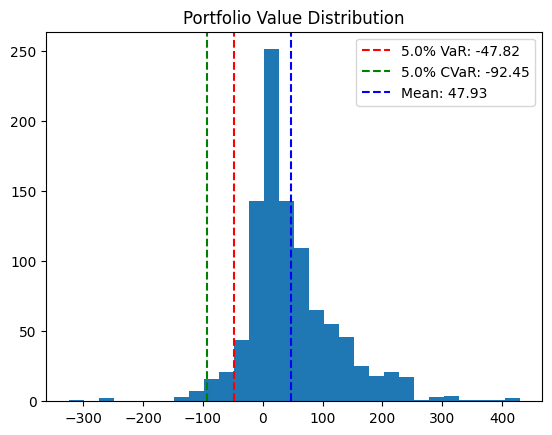

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n_assets = 10
n_trials = 1000
alpha = 0.05
target_return = 0.1

# Generate returns
returns = np.random.normal(0.1, 0.2, size=(n_trials, n_assets))

# Define urn model
wealth = np.ones(n_assets)
prob = wealth / np.sum(wealth)

# Initialize variables
portfolio = np.zeros(n_assets)
portfolio_value = np.zeros(n_trials)

# Iterate through trials
for t in range(n_trials):
    # Choose asset from urn
    chosen_asset = np.random.choice(np.arange(n_assets), p=prob)
    # Update portfolio
    portfolio[chosen_asset] += 1
    # Calculate portfolio value
    portfolio_value[t] = np.dot(portfolio, returns[t])
    # Update urn probabilities
    wealth[chosen_asset] += portfolio_value[t]
    prob = wealth / np.sum(wealth)
    
# Calculate statistics
mean_portfolio_value = np.mean(portfolio_value)
std_portfolio_value = np.std(portfolio_value)
VaR = np.percentile(portfolio_value, alpha*100)
CVaR = np.mean(portfolio_value[portfolio_value <= VaR])

# Plot results
plt.hist(portfolio_value, bins=30)
plt.axvline(x=VaR, color='r', linestyle='--', label=f'{alpha*100}% VaR: {VaR:.2f}')
plt.axvline(x=CVaR, color='g', linestyle='--', label=f'{alpha*100}% CVaR: {CVaR:.2f}')
plt.axvline(x=mean_portfolio_value, color='b', linestyle='--', label=f'Mean: {mean_portfolio_value:.2f}')
plt.title('Portfolio Value Distribution')
plt.legend()
plt.show()

In [31]:
import numpy as np
import pymc as pm

# Generate simulated data
n = 1000
p_a = 0.2
p_b = 0.25

obs_a = np.random.binomial(1, p_a, n)
obs_b = np.random.binomial(1, p_b, n)

# PyMC3 model
with pm.Model() as ab_test_model:
    # Prior distributions for conversion rates
    p_a = pm.Beta('p_a', alpha=1, beta=1)
    p_b = pm.Beta('p_b', alpha=1, beta=1)
    
    # Likelihood for the observations
    obs_a = pm.Bernoulli('obs_a', p=p_a, observed=obs_a)
    obs_b = pm.Bernoulli('obs_b', p=p_b, observed=obs_b)
    
    # Difference between the conversion rates
    delta = pm.Deterministic('delta', p_b - p_a)
    
    # Test if B is at least 10% better than A
    prob_b_better = pm.Deterministic('prob_b_better', delta > 0.1)

# Run the MCMC sampler
with ab_test_model:
    trace = pm.sample(1000, tune=500)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_a, p_b]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 12 seconds.


In [32]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

<Axes: title={'center': 'delta'}>

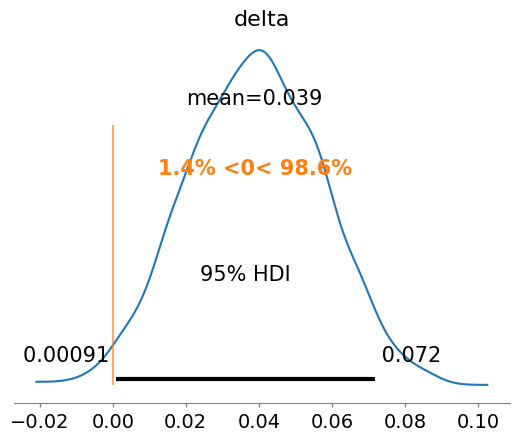

In [33]:
import arviz as az
# Plot the posterior distribution of the difference in groups
az.plot_posterior(trace, var_names=['delta'], ref_val=0, hdi_prob=0.95)

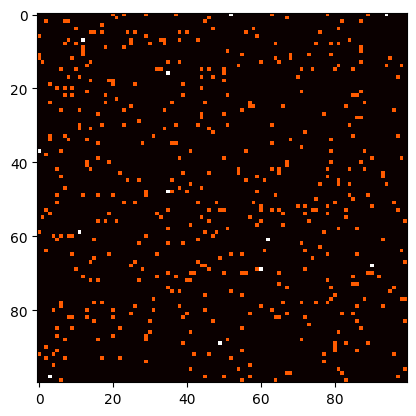

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the grid
grid_size = 100

# Define the intensity of the Poisson process (number of stars per unit area)
intensity = 0.05

# Generate the coordinates of the stars
stars = np.random.poisson(intensity, size=(grid_size, grid_size))

# Create a heatmap of the stars
plt.imshow(stars, cmap='hot', interpolation='nearest')

# Show the plot
plt.show()


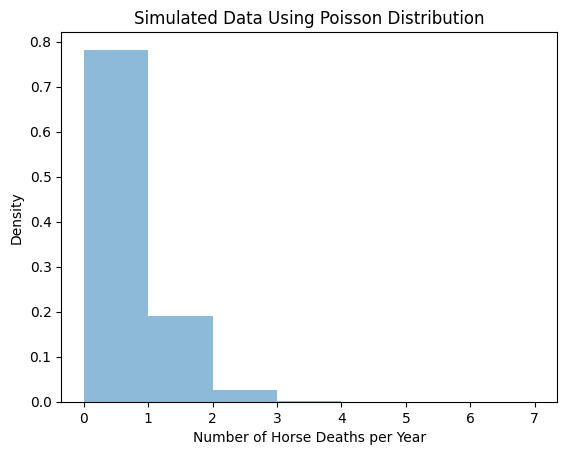

Expected Number of Horse Deaths per Year: 5.00


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Set the mean number of horse deaths per year
lambda_ = 0.25

# Generate simulated data using the Poisson distribution
n_years = 20
n_simulations = 1000
horse_deaths = np.random.poisson(lambda_, size=(n_years, n_simulations))

# Plot the simulated data
fig, ax = plt.subplots()
ax.hist(horse_deaths.ravel(), bins=range(8), density=True, alpha=0.5)
ax.set_xlabel('Number of Horse Deaths per Year')
ax.set_ylabel('Density')
ax.set_title('Simulated Data Using Poisson Distribution')
plt.show()

# Compute the expected number of horse deaths per year
mean_horse_deaths = lambda_ * n_years
print(f'Expected Number of Horse Deaths per Year: {mean_horse_deaths:.2f}')


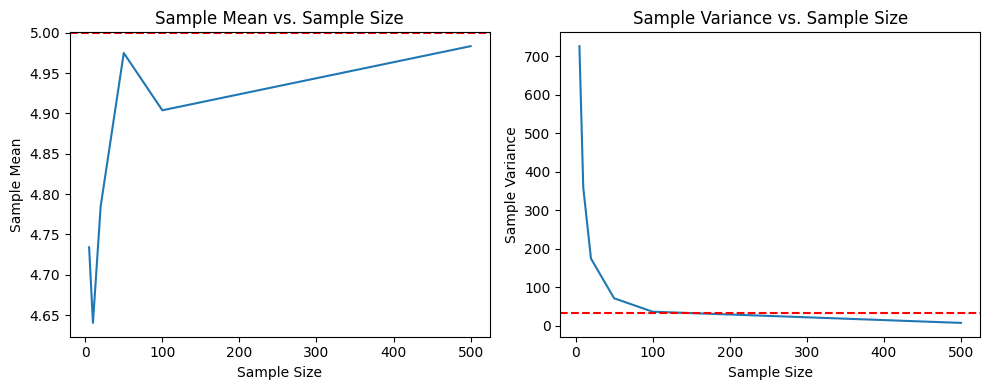

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Set the population mean and standard deviation
pop_mean = 5
pop_std = 60

# Set the sample sizes
sample_sizes = [5, 10, 20, 50, 100, 500]

# Generate 1000 samples for each sample size and calculate the means
means = []
variances = []
for size in sample_sizes:
    sample_means = []
    for i in range(10000):
        sample = np.random.normal(pop_mean, pop_std, size)
        sample_means.append(np.mean(sample))
    means.append(np.mean(sample_means))
    variances.append(np.var(sample_means))

# Plot the means and variances as a function of sample size
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, means)
plt.axhline(y=pop_mean, color='r', linestyle='--')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.title('Sample Mean vs. Sample Size')

plt.subplot(1, 2, 2)
plt.plot(sample_sizes, variances)
plt.axhline(y=pop_std**2 / np.array(sample_sizes).mean(), color='r', linestyle='--')
plt.xlabel('Sample Size')
plt.ylabel('Sample Variance')
plt.title('Sample Variance vs. Sample Size')

plt.tight_layout()
plt.show()

Observed difference of means: 1.25
Bootstrap confidence interval: (0.75, 1.76)
Theoretical confidence interval: (0.74, 1.77)


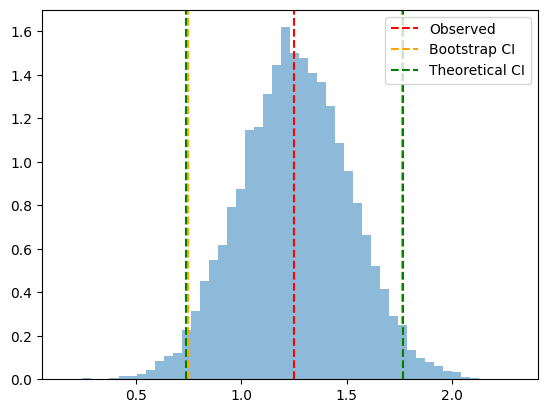

In [54]:
import numpy as np

# Generate two independent groups of data
np.random.seed(42)
group_a = np.random.normal(loc=10, scale=2, size=100)
group_b = np.random.normal(loc=11, scale=2, size=100)

# Compute the observed difference of means
obs_diff = np.mean(group_b) - np.mean(group_a)

# Define the bootstrap function to resample the data and compute the difference of means
def bootstrap_diff_means(group_a, group_b, num_resamples):
    resample_diffs = []
    for i in range(num_resamples):
        resample_a = np.random.choice(group_a, size=len(group_a), replace=True)
        resample_b = np.random.choice(group_b, size=len(group_b), replace=True)
        resample_diffs.append(np.mean(resample_b) - np.mean(resample_a))
    return resample_diffs

# Compute the bootstrap distribution of the difference of means
bootstrap_diffs = bootstrap_diff_means(group_a, group_b, num_resamples=10000)

# Compute the 95% confidence interval using the bootstrap distribution
ci_low = np.percentile(bootstrap_diffs, 2.5)
ci_high = np.percentile(bootstrap_diffs, 97.5)

# Compute the standard error of the difference of means
se = np.sqrt(np.var(group_a)/len(group_a) + np.var(group_b)/len(group_b))

# Compute the theoretical 95% confidence interval
ci_low_theoretical = obs_diff - 1.96 * se
ci_high_theoretical = obs_diff + 1.96 * se

# Print the results
print("Observed difference of means: {:.2f}".format(obs_diff))
print("Bootstrap confidence interval: ({:.2f}, {:.2f})".format(ci_low, ci_high))
print("Theoretical confidence interval: ({:.2f}, {:.2f})".format(ci_low_theoretical, ci_high_theoretical))

# Visualize the bootstrap distribution and theoretical confidence interval
import matplotlib.pyplot as plt

plt.hist(bootstrap_diffs, bins=50, alpha=0.5, density=True)
plt.axvline(x=obs_diff, color='red', linestyle='--', label='Observed')
plt.axvline(x=ci_low, color='orange', linestyle='--', label='Bootstrap CI')
plt.axvline(x=ci_high, color='orange', linestyle='--')
plt.axvline(x=ci_low_theoretical, color='green', linestyle='--', label='Theoretical CI')
plt.axvline(x=ci_high_theoretical, color='green', linestyle='--')
plt.legend()
plt.show()

In [55]:
import numpy as np
from scipy.stats import wilcoxon

# Simulate data from two portfolios with heavy tails
np.random.seed(123)
portfolio1 = np.random.laplace(loc=0, scale=1, size=100)
portfolio2 = np.random.laplace(loc=0.2, scale=1, size=100)

# Calculate the difference in means
mean_diff = np.mean(portfolio1) - np.mean(portfolio2)

# Bootstrap confidence interval
bootstrap_means = []
n_bootstrap = 1000
for i in range(n_bootstrap):
    # Resample with replacement
    resample1 = np.random.choice(portfolio1, size=len(portfolio1), replace=True)
    resample2 = np.random.choice(portfolio2, size=len(portfolio2), replace=True)
    # Calculate the difference in means
    bootstrap_means.append(np.mean(resample1) - np.mean(resample2))
# Calculate the 95% confidence interval
bootstrap_ci = np.percentile(bootstrap_means, [2.5, 97.5])

# Wilcoxon rank-sum test
w, p = wilcoxon(portfolio1, portfolio2)

print("Bootstrap 95% confidence interval:", bootstrap_ci)
print("Wilcoxon rank-sum test p-value:", p)


Bootstrap 95% confidence interval: [-0.47155709  0.23333061]
Wilcoxon rank-sum test p-value: 0.40342896597006617


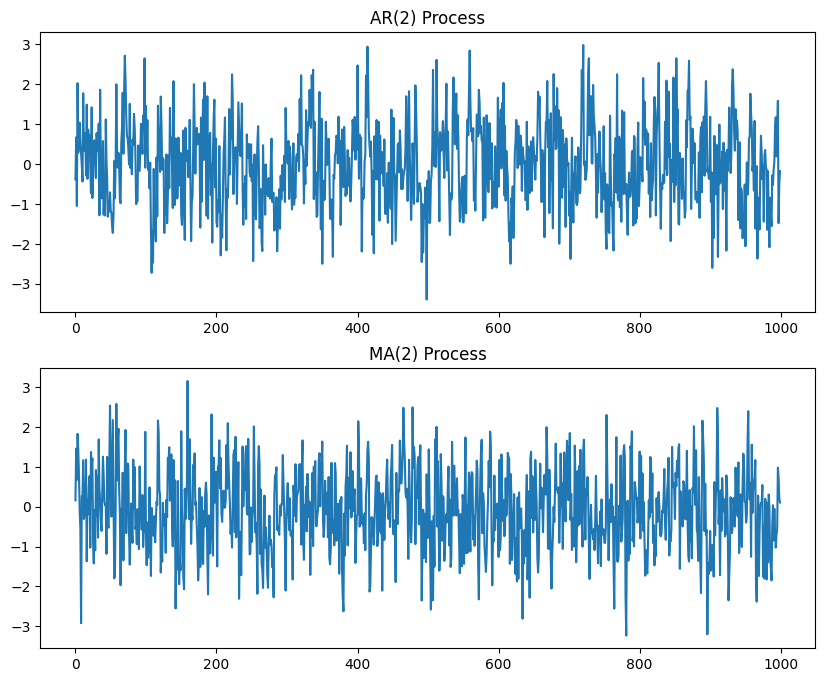

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Generate an AR(2) process
n = 1000
phi1, phi2 = 0.3, 0.2
e = np.random.normal(size=n)
y = np.zeros(n)
y[0], y[1] = e[0], phi1*e[0] + e[1]
for i in range(2, n):
    y[i] = phi1*y[i-1] + phi2*y[i-2] + e[i]

# Generate an MA(2) process
theta1, theta2 = 0.3, 0.2
e = np.random.normal(size=n)
v = np.zeros(n)
v[0], v[1] = e[0], e[1]
for i in range(2, n):
    v[i] = e[i] + theta1*e[i-1] + theta2*e[i-2]

# Plot the time series
fig, axs = plt.subplots(nrows=2, figsize=(10, 8))
axs[0].plot(y)
axs[0].set_title('AR(2) Process')
axs[1].plot(v)
axs[1].set_title('MA(2) Process')
plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/ml-prob/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


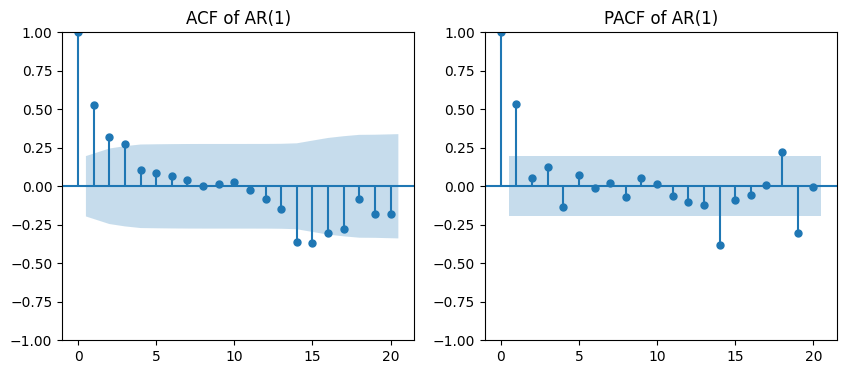

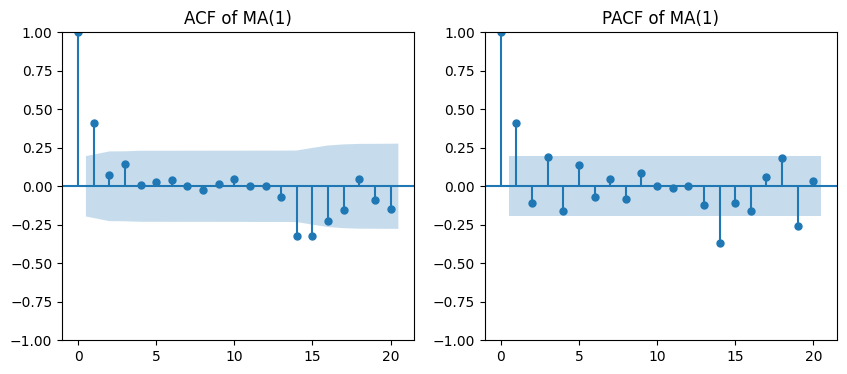

In [57]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate AR(1) time series
np.random.seed(123)
n = 100
phi = 0.5
eps = np.random.normal(size=n)
ar = np.zeros(n)
ar[0] = eps[0]
for t in range(1, n):
    ar[t] = phi * ar[t-1] + eps[t]

# Generate MA(1) time series
theta = 0.5
ma = np.zeros(n)
for t in range(1, n):
    ma[t] = eps[t] + theta * eps[t-1]

# Visualize ACF and PACF for AR(1)
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
sm.graphics.tsa.plot_acf(ar, lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(ar, lags=20, ax=ax[1])
ax[0].set_title('ACF of AR(1)')
ax[1].set_title('PACF of AR(1)')

# Visualize ACF and PACF for MA(1)
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
sm.graphics.tsa.plot_acf(ma, lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(ma, lags=20, ax=ax[1])
ax[0].set_title('ACF of MA(1)')
ax[1].set_title('PACF of MA(1)')

plt.show()


In [59]:
pm.Normal?

Init signature:
pm.Normal(
    name: str,
    *args,
    rng=None,
    dims: Union[str, Sequence[Optional[str]], NoneType] = None,
    initval=None,
    observed=None,
    total_size=None,
    transform=UNSET,
    **kwargs,
) -> pytensor.tensor.var.TensorVariable
Docstring:     
Univariate normal log-likelihood.

The pdf of this distribution is

.. math::

   f(x \mid \mu, \tau) =
       \sqrt{\frac{\tau}{2\pi}}
       \exp\left\{ -\frac{\tau}{2} (x-\mu)^2 \right\}

Normal distribution can be parameterized either in terms of precision
or standard deviation. The link between the two parametrizations is
given by

.. math::

   \tau = \dfrac{1}{\sigma^2}

.. plot::
    :context: close-figs

    import matplotlib.pyplot as plt
    import numpy as np
    import scipy.stats as st
    import arviz as az
    plt.style.use('arviz-darkgrid')
    x = np.linspace(-5, 5, 1000)
    mus = [0., 0., 0., -2.]
    sigmas = [0.4, 1., 2., 0.4]
    for mu, sigma in zip(mus, sigmas):
        pdf = st.norm.pd

In [61]:
import numpy as np
import pymc as pm

# Define the data generation process
def generate_data(num_items, num_purchases, prob_explore):
    items = np.arange(num_items)
    purchases = []
    for i in range(num_purchases):
        if np.random.rand() < prob_explore:
            # Explore a random item
            item = np.random.choice(items)
        else:
            # Buy the best item seen so far
            item = np.argmax(np.random.normal(loc=5, scale=2, size=num_items))
        purchases.append(item)
    return np.array(purchases)

# Generate some example data
purchases = generate_data(num_items=10, num_purchases=100, prob_explore=0.2)

# Define the model
with pm.Model() as model:
    # Priors
    theta = pm.Beta('theta', alpha=1, beta=1)
    mu = pm.Normal('mu', mu=5, sigma=2)
    sigma = pm.HalfNormal('sigma', sigma=1)
    # Likelihood
    y = pm.Data('y', purchases)
    like = pm.Potential('like', 
        pm.math.log(theta * np.exp(-0.5 * (y - mu) ** 2 / sigma ** 2) \
                                             + (1 - theta) / len(np.unique(y))))
    # Posterior
    trace = pm.sample(5000, tune=1000, target_accept=0.9, random_seed=123)

# Check if the customer is exploring or buying what they like


/opt/homebrew/Caskroom/miniforge/base/envs/ml-prob/lib/python3.10/site-packages/pymc/data.py:427: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, mu, sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 18 seconds.


KeyError: 'theta'

In [69]:
# Define the data generation process
np.random.seed(123)
num_customers = 5
num_products = 10
colors = ['red', 'blue', 'green', 'yellow', 'pink']
shapes = ['circle', 'square', 'triangle', 'star', 'heart']
product_colors = np.random.choice(colors, size=num_products)
product_shapes = np.random.choice(shapes, size=num_products)
data = []
for i in range(num_customers):
    likes = np.random.choice([True, False], size=num_products*2)
    for j in range(num_products):
        product = 'product{}'.format(j)
        data.append({
            'customer': 'customer{}'.format(i),
            'product': product,
            'color': product_colors[j],
            'shape': product_shapes[j],
            'like': likes[j*2] and likes[j*2+1]
        })
df = pd.DataFrame(data)

# Define the model
with pm.Model() as model:
    # Priors
    color_probs = pm.Beta('color_probs', alpha=1, beta=1, shape=len(colors))
    shape_probs = pm.Beta('shape_probs', alpha=1, beta=1, shape=len(shapes))
    # Likelihood
    for i, row in df.iterrows():
        p_color = color_probs[colors.index(row['color'])]
        p_shape = shape_probs[shapes.index(row['shape'])]
        like = row['like']
        pm.Bernoulli('like_{}'.format(i), p=p_color * p_shape, observed=like)
    # Posterior
    trace = pm.sample(5000, tune=1000, target_accept=0.9, random_seed=123)


array([[<Axes: title={'center': 'color_probs\n0'}>,
        <Axes: title={'center': 'color_probs\n1'}>,
        <Axes: title={'center': 'color_probs\n2'}>],
       [<Axes: title={'center': 'color_probs\n3'}>,
        <Axes: title={'center': 'color_probs\n4'}>,
        <Axes: title={'center': 'shape_probs\n0'}>],
       [<Axes: title={'center': 'shape_probs\n1'}>,
        <Axes: title={'center': 'shape_probs\n2'}>,
        <Axes: title={'center': 'shape_probs\n3'}>],
       [<Axes: title={'center': 'shape_probs\n4'}>, <Axes: >, <Axes: >]],
      dtype=object)

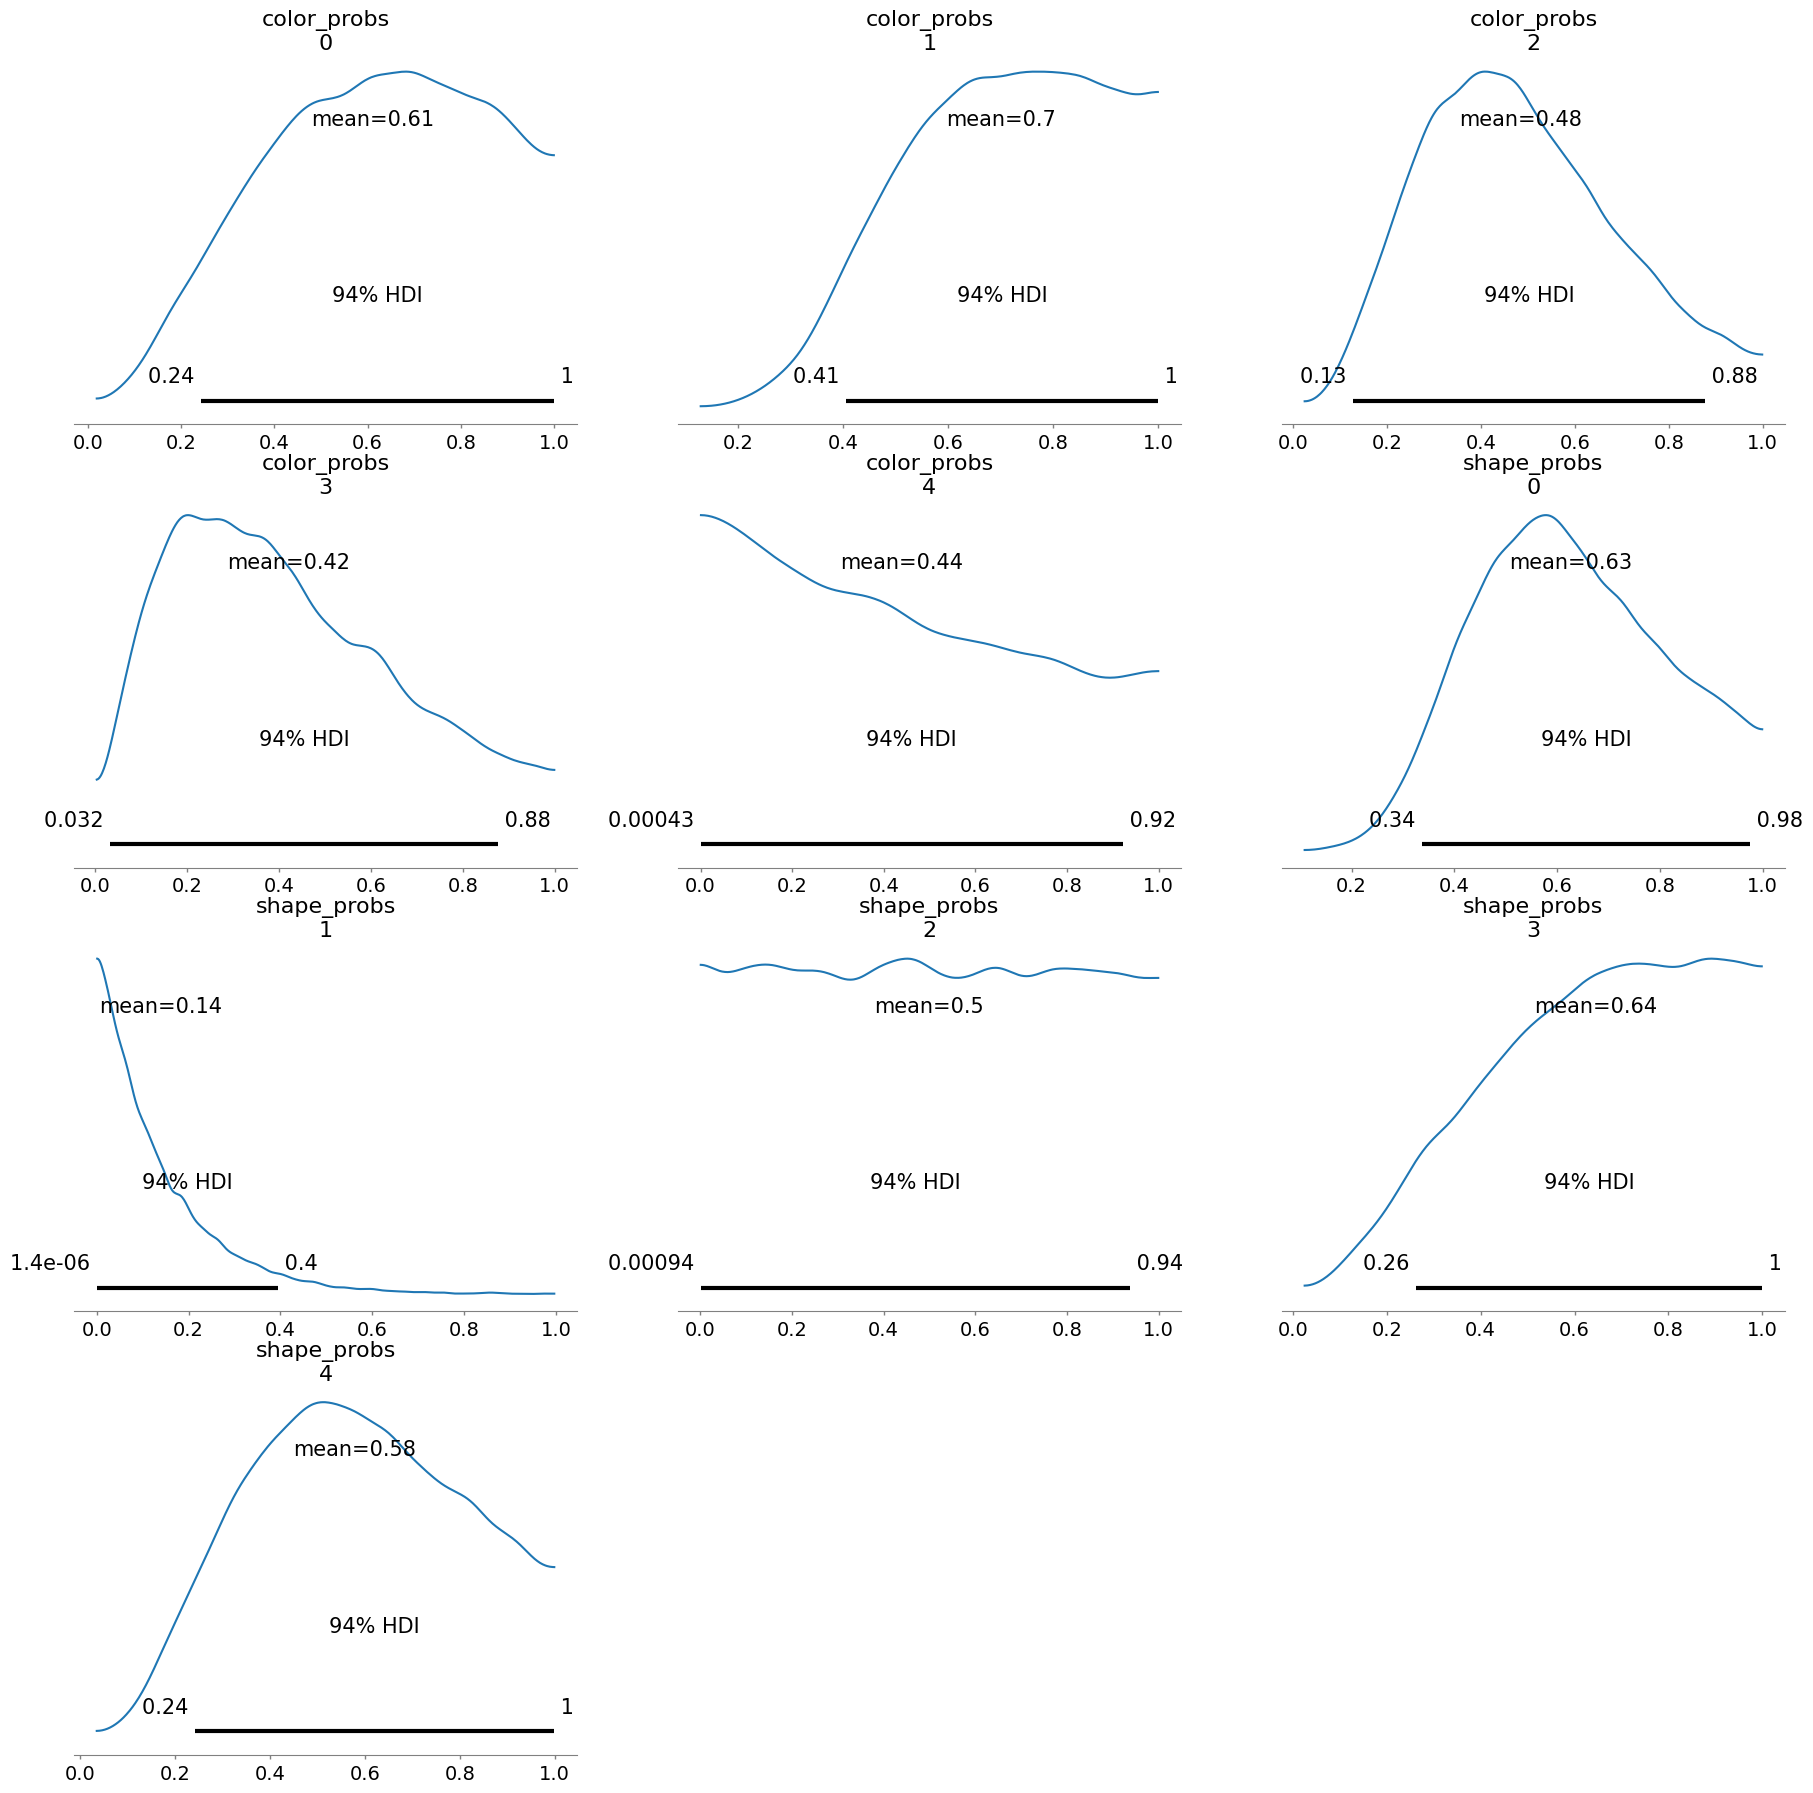

In [90]:
az.plot_posterior(trace)

In [93]:

# Define the data generation process
def generate_data(num_customers, num_ratings, shape_probs, color_probs):
    shapes = np.arange(len(shape_probs))
    colors = np.arange(len(color_probs))
    ratings = np.zeros((num_customers, num_ratings), dtype=int)
    for i in range(num_customers):
        for j in range(num_ratings):
            shape = np.random.choice(shapes, p=shape_probs)
            color_probs_given_shape = color_probs[shape] / np.sum(color_probs[shape])
            color = np.random.choice(colors, p=color_probs_given_shape)
            ratings[i, j] = shape * len(colors) + color
    return ratings

# Generate some example data
shape_probs = [0.4, 0.3, 0.3]
color_probs = [[0.1, 0.7, 0.2], [0.5, 0.2, 0.3], [0.3, 0.3, 0.4]]
ratings = generate_data(num_customers=5, num_ratings=20, shape_probs=shape_probs, color_probs=color_probs)


In [96]:
ratings

array([[4, 2, 4, 1, 4, 7, 4, 4, 6, 6, 1, 2, 5, 1, 3, 1, 1, 3, 8, 0],
       [1, 8, 1, 4, 1, 1, 4, 1, 1, 7, 7, 1, 2, 1, 4, 2, 6, 1, 8, 1],
       [7, 6, 5, 6, 3, 4, 1, 7, 5, 6, 8, 1, 1, 3, 5, 3, 5, 3, 5, 2],
       [7, 6, 8, 6, 1, 1, 3, 2, 5, 1, 7, 1, 1, 1, 1, 3, 3, 5, 7, 1],
       [3, 7, 5, 3, 1, 6, 5, 2, 6, 4, 0, 0, 2, 6, 2, 4, 1, 7, 1, 7]])

In [95]:

# Define the model
with pm.Model() as model:
    # Hyperpriors
    alpha_shape = pm.HalfNormal('alpha_shape', sigma=1)
    alpha_color = pm.HalfNormal('alpha_color', sigma=1)
    # Priors
    shape_probs = pm.Dirichlet('shape_probs', a=np.ones(len(shape_probs)) * alpha_shape, shape=len(shape_probs))
    color_probs = []
    for i in range(len(shape_probs)):
        cp = pm.Dirichlet('color_probs_{}'.format(i), a=np.ones(len(color_probs[i])) * alpha_color, shape=len(color_probs[i]))
        color_probs.append(cp)
    # Likelihood
    ratings_data = pm.Data('ratings_data', ratings)
    for i in range(ratings.shape[0]):
        for j in range(ratings.shape[1]):
            shape = ratings_data[i, j] // len(color_probs[0])
            color = ratings_data[i, j] % len(color_probs[0])
            prob = shape_probs[shape] * color_probs[shape][color]
            like = pm.Bernoulli('like_{}_{}'.format(i, j), p=prob, observed=1)
    # Posterior
    trace = pm.sample(1000, tune=500, target_accept=0.9, random_seed=123)

TypeError: object of type 'TensorVariable' has no len()

In [ ]:

# Print the inferred shape and color preferences for each customer
for i in range(ratings.shape[0]):
    shape_probs_mean = np.mean(trace['shape_probs'], axis=0)
    color_probs_mean = np.mean(trace['color_probs_{}'.format(shape)], axis=0)
    shape_pref = np.argmax(shape_probs_mean)
    color_pref = np.argmax(color_probs_mean)
    print("Customer {}: Shape preference = {}, Color preference = {}".format(i, shape_pref, color_pref))
In this model, we first generate the data by randomly selecting a shape and a color for each rating, with the probability of selecting a color given the shape being defined by the color_probs matrix. We then define a hierarchical Bayesian model with Dirichlet priors for the shape and color preferences of each customer. The likelihood is defined as a product of Bernoulli distributions, one for each rating, with the probability of a "like" rating being the product of the shape and color probabilities for that rating. The model is then fit using MCMC




In [97]:
import graphviz

# Create a new directed graph
model = graphviz.Digraph("Bayesian_Model")

# Add nodes for customer preferences
model.node("alpha", "α")
model.node("beta", "β")
model.node("ui", "u_i")
model.node("vj", "v_j")

# Add nodes for product attributes
model.node("category", "category(k)")
model.node("color", "color(k)")

# Add nodes for quizzes and past orders
model.node("theta", "θ")
model.node("phi", "ϕ")
model.node("psi", "ψ")
model.node("yijk", "y_{ijk}")
model.node("zijk", "z_{ijk}")
model.node("rijk", "r_{ijk}")

# Add edges for customer preferences
model.edge("alpha", "ui")
model.edge("beta", "ui")
model.edge("alpha", "vj")
model.edge("beta", "vj")

# Add edges for quizzes and past orders
model.edge("ui", "yijk")
model.edge("vj", "yijk")
model.edge("category", "yijk")
model.edge("color", "yijk")
model.edge("theta", "yijk")

model.edge("ui", "zijk")
model.edge("vj", "zijk")
model.edge("category", "zijk")
model.edge("color", "zijk")
model.edge("phi", "zijk")

model.edge("ui", "rijk")
model.edge("vj", "rijk")
model.edge("category", "rijk")
model.edge("color", "rijk")
model.edge("psi", "rijk")

# Save the graph to a file and display it
model.render("model_graph", format="png")
model.view("model_graph.png")


'model_graph.png.pdf'

In [98]:
from pulp import LpProblem, LpVariable, LpMaximize, lpSum

# Define the data
products = [
    {'name': 'A', 'cost': 50, 'profit': 100, 'capacity': 10},
    {'name': 'B', 'cost': 30, 'profit': 60, 'capacity': 20},
    {'name': 'C', 'cost': 20, 'profit': 40, 'capacity': 15},
]

budget = 1000
total_storage = 30

# Create the optimization problem
prob = LpProblem("Product_Stocking", LpMaximize)

# Create variables
product_vars = LpVariable.dicts("product", [p['name'] for p in products], lowBound=0, cat='Integer')

# Add the objective function
prob += lpSum(p['profit'] * product_vars[p['name']] for p in products)

# Add the constraints
prob += lpSum(p['cost'] * product_vars[p['name']] for p in products) <= budget
prob += lpSum(product_vars[p['name']] for p in products) <= total_storage

for p in products:
    prob += product_vars[p['name']] <= p['capacity']

# Solve the problem
prob.solve()

# Print the result
for p in products:
    print(f"Stock {product_vars[p['name']].value()} units of product {p['name']}.")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniforge/base/envs/ml-prob/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/t8/gwvxsg1n0_b8bc6t4k_37dk40000gn/T/8422d6a2260b4eb685a6c3a41f5cfb6b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/t8/gwvxsg1n0_b8bc6t4k_37dk40000gn/T/8422d6a2260b4eb685a6c3a41f5cfb6b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 29 RHS
At line 35 BOUNDS
At line 39 ENDATA
Problem MODEL has 5 rows, 3 columns and 9 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2000 - 0.00 seconds
Cgl0004I processed model has 2 rows, 3 columns (3 integer (0 of which binary)) and 6 elements
Cutoff increment increased from 1e-05 to 19.9999
Cbc0012I Integer solution of -1920 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 s

In [108]:
import random
from pulp import LpProblem, LpVariable, LpMaximize, lpSum

# Generate a dataset with 50 products
random.seed(42)
products = [
    {
        'name': f"P{i}",
        'cost': random.randint(10, 100),
        'profit': random.randint(30, 150),
        'capacity': random.randint(5, 50),
    }
    for i in range(50)
]

budget = 10000
total_storage = 200

# Create the optimization problem
prob = LpProblem("Product_Stocking", LpMaximize)

# Create variables
product_vars = LpVariable.dicts("product", [p['name'] for p in products], lowBound=0, cat='Integer')

# Add the objective function
prob += lpSum(p['profit'] * product_vars[p['name']] for p in products)

# Add the constraints
prob += lpSum(p['cost'] * product_vars[p['name']] for p in products) <= budget
prob += lpSum(product_vars[p['name']] for p in products) <= total_storage

for p in products:
    prob += product_vars[p['name']] <= p['capacity']

# Solve the problem
prob.solve()

# Print the result
for p in products:
    print(f"Stock {product_vars[p['name']].value()} units of product {p['name']}.")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniforge/base/envs/ml-prob/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/t8/gwvxsg1n0_b8bc6t4k_37dk40000gn/T/4b5e11c224a642ec9db8165aa4acddd6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/t8/gwvxsg1n0_b8bc6t4k_37dk40000gn/T/4b5e11c224a642ec9db8165aa4acddd6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 57 COLUMNS
At line 358 RHS
At line 411 BOUNDS
At line 462 ENDATA
Problem MODEL has 52 rows, 50 columns and 150 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 27339.1 - 0.00 seconds
Cgl0004I processed model has 2 rows, 50 columns (50 integer (0 of which binary)) and 100 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0012I Integer solution of -27194 found by DiveCoefficient after 0 iterations and 0

In [120]:
df_results = [
    {"product_id": k, "quantity_suggested": v.value()}
    for k, v in product_vars.items()
]

In [131]:
df = pd.DataFrame([{**p, **pp} for p, pp in zip(df_results, products)])

In [132]:
df

,product_id,quantity_suggested,name,cost,profit,capacity
0,P0,0.0,P0,91,44,6
1,P1,0.0,P1,45,61,19
2,P2,11.0,P2,27,124,11
3,P3,0.0,P3,96,124,39
4,P4,0.0,P4,21,105,32
5,P5,0.0,P5,14,33,10
6,P6,0.0,P6,37,59,37
7,P7,0.0,P7,87,33,40
8,P8,0.0,P8,35,121,46
9,P9,0.0,P9,99,99,31
